# The Effects of Policy H6 on Social Housing

Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Affordable Housing in Coventry

We begin our analysis looking at the delivery of different components of affordable housing (affordable rent and social rent) within Coventry, comparing them to the overall housing market and the housing requirements set out by the Local Plan. 


Primarily, we are interested in how Policy H6 affects social housing in Coventry specifically, since there are no explicit requirements on social housing within the plan. The Local Plan sets out that new developments with >25 dwellings or >1ha in area must provide 25% of its dwellings as affordable housing. Further, the Local Plan assesses affordable housing need at the first 4 digits of the postcode level to determine areas of high existing stock of social housing (>1,500 properties) and areas of low existing stock of social housing (<500 properties). Anything in between is determined as medium concentration. Within the geographic areas, the provision of affordable housing is as follows:

* In areas of high concentration: 10% Social/Affordable Rental Provision; 15% Intermediate Provision
* In areas of medium concentration: 12.5% Social/Affordable Rental Provision; 12.5% Intermediate Provision
* In areas of low concentration: 15% Social/Affordable Rental Provision; 10% Intermediate Provision

We assume the intention of this policy is to bring up the level of affordable housing in areas of low concentration but is this setting up misaligned incentives? Areas of high concentration of social housing require fewer social houses making it more attractive to developers (because it gets higher rents) reducing the concentration of social housing and areas of low concentration don’t get as much development (because of the higher social/affordable housing requirement).

The Local Plan also recommends that the housing mix of affordable housing should follow the latest SHMA/SHLAA which suggests that houses with 3 or more bedrooms should make up 50% of the housing mix. However, as the 2021 Homefinder data suggests, houses with 3 or more bedrooms only make 14% of socially rented homes. We assume that since Policy H6 does not set out explicit requirements on the size of homes provided within the plan, developers might be building larger homes for the more profitable Intermediate Homes or Affordable Rent sector rather than the social rent sectors which is mostly made up of bedsits, 1BR, and 2BR homes. 

Finally the Council understands that it may not always be possible for developers to provide the full 25% at every site and thus allows developers to make viability arguments and reach alternative solutions such as off-site delivery or commuted sum payments through the S106 developer's contribution agreement. We expect that this avenue has a significant effect on the delivery of socially rented homes in Coventry and may be contributing to the undersupply problem of homes for Coventry's social housing market.



In this report we hope to answer the following questions:

* How has Policy H6 affected social housing specifically?
* Has Policy H6 succesfully rebalanced the concetration of Affordable Housing (and specifically social housing) in Coventry?
* How has Policy H6 affected the housing mix of affordable housing and social housing?
* How have viability arguments/settlements affected the delivery of social housing in Coventry?



## Exploring Housing Supply in Coventry

We begin this analysis by exploring the housing market of Coventry. We compare net dwellings per year to additional affordable, social, and intermediate housing. We try to identify any trends so it may inform analysis going forward. We also compare affordable housing delivery to the target set by the Council to meet their housing need of 348 homes/year. We also look at how social housing and affordable housing diverges in their delivery and the falling delivery of social housing. Finally, we compare the affordable housing market in Coventry with the rest of the UK.

### Data

For our data on net dwellings, we use the Department for Levelling Up, Housing, and Communities (DLUHC) and Ministry of Housing, Communities and Local Government (MHCLG) Live Table 122 available [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1035591/Live_Table_122.ods 'Live Table 122'). For our data on additional dwellings for social housing, affordable housing, and intermediate rent - we use DLUHC Live Tables 1006-1008 available [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1034087/Live_Tables_1006-1009.ods 'Live Table 1006-1009').

The data is prepared for analysis prior to importing, the process is documented in the files titled `netdwellings.ipynb`, `socialrent.ipynb`, `totalaffordablerent.ipynb`, `affordablerent.ipynb`, `affordablehomes.ipynb` and `intermediaterent.ipynb`. 

Total Affordable Rent is the sum of socially rented and affordable rent dwellings.

#### Importing data

In [49]:
df_netD = pd.read_excel('Net Dwellings by LA, 2001-2021.xlsx',na_values=['..']) # net dwellings
df_SR = pd.read_excel('Socially Rented Dwellings by LA, 1992-2021.xlsx')        # socially rented
df_AR = pd.read_excel('Affordable Rent Dwellings by LA, 2011-2021.xlsx')        # affordable rent
df_AH = pd.read_excel('Affordable Home Ownership by LA, 1991-2021.xlsx')        # affordable home ownership
df_IR = pd.read_excel('Intermediate Rent Dwellings by LA, 2003-2021.xlsx')      # intermediate rent
df_TAR = pd.read_excel('Total Affordable Rent Dwellings by LA, 1992-2021.xlsx') # total affordable rent
df_hl = pd.read_excel('Homelessness 2009-2018 by LA.xlsx')                      # homelessness count
df_TD = pd.read_excel('New Dwellings by LA 1980-2021.xlsx',na_values=['..'])    # total new dwellings

In [50]:
for x in [df_netD,df_SR,df_AR,df_AH,df_IR,df_TAR,df_TD]:
    x.drop(columns='Unnamed: 0',inplace=True)

In [51]:
## code for shape and types of dataframes to be inserted

Collating datasets into a single dataframe for Coventry

In [52]:
dcov = df_TAR[df_TAR.loc[:,'LA']=='Coventry'].copy()
dcov.rename(columns={'new_dwellings':'TAR'},inplace=True)
dcov.reset_index(drop=True,inplace=True)
dcov.head()

,LA_code,LA,year,TAR
0,E08000026,Coventry,1992,127.0
1,E08000026,Coventry,1993,331.0
2,E08000026,Coventry,1994,474.0
3,E08000026,Coventry,1995,371.0
4,E08000026,Coventry,1996,315.0


In [53]:
dcov = pd.merge(dcov,df_netD[['LA_code','year','net dwellings']],how='left',on=['LA_code','year'])
dcov.rename(columns={'net dwellings':'netD'},inplace=True)

In [54]:
dcov = pd.merge(dcov,df_SR[['LA_code','year','new_dwellings']],how='left',on=['LA_code','year'])
dcov.rename(columns={'new_dwellings':'SR'},inplace=True)

In [55]:
dcov = pd.merge(dcov,df_AR[['LA_code','year','DC']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC':'AR'},inplace=True)

In [56]:
dcov = pd.merge(dcov,df_AH[['LA_code','year','DC']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC':'AH'},inplace=True)

In [57]:
dcov = pd.merge(dcov,df_IR[['LA_code','year','DC']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC':'IR'},inplace=True)

In [58]:
df_TD.rename(columns={'ONS Code':'LA_code','Local Authority':'LA'},inplace=True)

In [59]:
dcov = pd.merge(dcov,df_TD[['LA_code','year','DC_Total']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC_Total':'TD'},inplace=True)

In [60]:
dcov

,LA_code,LA,year,TAR,netD,SR,AR,AH,IR,TD
0,E08000026,Coventry,1992,127.0,NaN,102.0,NaN,25.0,NaN,230
1,E08000026,Coventry,1993,331.0,NaN,231.0,NaN,100.0,NaN,390
2,E08000026,Coventry,1994,474.0,NaN,378.0,NaN,96.0,NaN,330
3,E08000026,Coventry,1995,371.0,NaN,271.0,NaN,100.0,NaN,490
4,E08000026,Coventry,1996,315.0,NaN,203.0,NaN,112.0,NaN,530
5,E08000026,Coventry,1997,163.0,NaN,86.0,NaN,77.0,NaN,460
6,E08000026,Coventry,1998,211.0,NaN,127.0,NaN,84.0,NaN,410
7,E08000026,Coventry,1999,227.0,NaN,193.0,NaN,34.0,NaN,570
8,E08000026,Coventry,2000,204.0,NaN,190.0,NaN,14.0,NaN,510
9,E08000026,Coventry,2001,100.0,NaN,99.0,NaN,1.0,NaN,340


In [61]:
dcov_hl = df_hl[df_hl.loc[:,'LA']=='Coventry'].copy()
dcov_hl.head()

,LA_code,LA,households,homeless_acc,homeless_pm,TA,TA_pm,no_accom,year,date
272,E08000026,Coventry,127.032,550,4.329618,24,0.188929,0,2009,2009-01-01
598,E08000026,Coventry,127.000,538,4.23622,39,0.307087,0,2010,2010-01-01
924,E08000026,Coventry,127.000,703,5.535433,32,0.251969,0,2011,2011-01-01
1250,E08000026,Coventry,127.000,576,4.54,67,0.53,315,2012,2012-01-01
1576,E08000026,Coventry,130.690,540,4.13,55,0.42,378,2013,2013-01-01


### Analysis

#### Summary Statistics

First, for Coventry alone:

In [62]:
dcov['TD'] = dcov['TD'].astype(float)

In [63]:
dcov[[x for x in dcov.columns[3:]]].describe()

,TAR,netD,SR,AR,AH,IR,TD
count,30.000000,20.000000,30.000000,10.000000,30.000000,18.000000,27.000000
mean,273.533333,924.150000,136.300000,134.600000,73.700000,12.444444,628.888889
std,111.972821,471.909812,88.817577,84.322397,55.964367,17.657600,244.215122
min,100.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,230.000000
25%,180.250000,629.250000,78.250000,87.000000,27.250000,0.000000,470.000000
50%,255.000000,915.000000,112.000000,137.000000,76.000000,1.000000,570.000000
75%,356.250000,1114.000000,199.000000,157.750000,103.000000,26.000000,800.000000
max,524.000000,2241.000000,378.000000,278.000000,233.000000,50.000000,1220.000000


Firstly, note that not all datasets cover the full range of years as seen in the `count` row. Let's examine the summary statistics for the years 2003-2021.

In [64]:
dcov_t = dcov[dcov.loc[:,'year']>2002].copy()

In [65]:
dcov_ss = dcov_t[[x for x in dcov_t.columns[3:]]].describe()
dcov_ss

,TAR,netD,SR,AR,AH,IR,TD
count,19.000000,19.000000,19.000000,10.000000,19.000000,18.000000,17.000000
mean,291.736842,943.000000,112.263158,134.600000,79.157895,12.444444,748.235294
std,108.025122,477.042742,79.194446,84.322397,64.077439,17.657600,223.109707
min,111.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,360.000000
25%,210.500000,670.500000,70.000000,87.000000,28.000000,0.000000,570.000000
50%,298.000000,918.000000,94.000000,137.000000,75.000000,1.000000,710.000000
75%,365.000000,1119.000000,142.000000,157.750000,116.000000,26.000000,870.000000
max,524.000000,2241.000000,291.000000,278.000000,233.000000,50.000000,1220.000000


In [68]:
dcov_ss.loc['mean','TAR']/dcov_ss.loc['mean','netD']

0.3093709884467266

Now that counts are more similar, we can see that on average Coventry provided around 292 additional dwellings as affordable homes between 2003-2021. In the same period, the average net delivery of all homes in Coventry was 943 homes which implies that the average delivery of affordable rent homes was 30.9% of the net delivery.

In the same period, Coventry provided an average of 112 socially rented dwellings, about 40% of total affordable dwellings and 12.36% of net dwellings. Affordable rented homes alone makes up 46% of total affordable homes in Coventry, the remaining portioon is made up of affordable home ownership, intermediate rent homes, and shared home ownership.

Visualising density plots

In [69]:
import itertools
comb = itertools.product(range(3),repeat=2)
comb = list(comb)
comb.append((3,0))

In [70]:
for x,y in enumerate(comb):
    print(x,y)

0 (0, 0)
1 (0, 1)
2 (0, 2)
3 (1, 0)
4 (1, 1)
5 (1, 2)
6 (2, 0)
7 (2, 1)
8 (2, 2)
9 (3, 0)


In [71]:
for x in [2,4,6]:
    del comb[x]

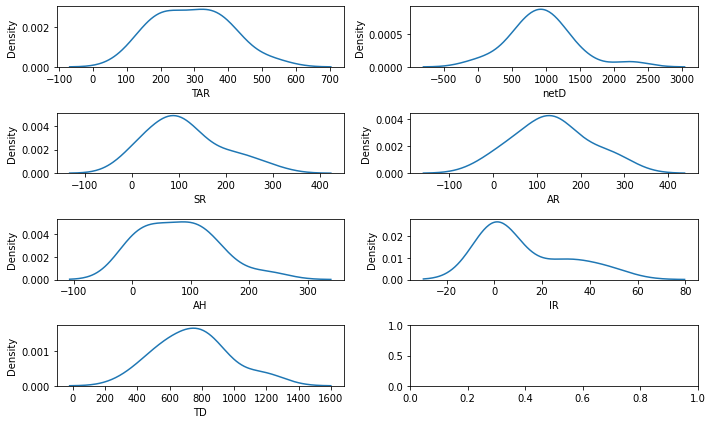

In [73]:
f, axs = plt.subplots(4,2,figsize=(10,6))
for k,a in enumerate(comb):
    sns.kdeplot(data=dcov_t,x=dcov_t.columns[3:][k],ax=axs[a])
f.tight_layout()


In [162]:
## analysis

### Exploring intervariable relationships

First, creating a datetime variable from `year`

In [74]:
dcov['date'] = pd.to_datetime(dcov['year'].astype(str), format='%Y')
dcov.head()

,LA_code,LA,year,TAR,netD,SR,AR,AH,IR,TD,date
0,E08000026,Coventry,1992,127.0,NaN,102.0,NaN,25.0,NaN,230.0,1992-01-01
1,E08000026,Coventry,1993,331.0,NaN,231.0,NaN,100.0,NaN,390.0,1993-01-01
2,E08000026,Coventry,1994,474.0,NaN,378.0,NaN,96.0,NaN,330.0,1994-01-01
3,E08000026,Coventry,1995,371.0,NaN,271.0,NaN,100.0,NaN,490.0,1995-01-01
4,E08000026,Coventry,1996,315.0,NaN,203.0,NaN,112.0,NaN,530.0,1996-01-01


In [75]:
dcov_t = dcov[dcov.loc[:,'year']>2002].copy()

In [76]:
dcov_t.head()

,LA_code,LA,year,TAR,netD,SR,AR,AH,IR,TD,date
11,E08000026,Coventry,2003,320.0,624.0,218.0,NaN,102.0,NaN,810.0,2003-01-01
12,E08000026,Coventry,2004,111.0,-8.0,98.0,NaN,13.0,0.0,NaN,2004-01-01
13,E08000026,Coventry,2005,174.0,308.0,131.0,NaN,43.0,0.0,NaN,2005-01-01
14,E08000026,Coventry,2006,172.0,631.0,122.0,NaN,50.0,0.0,520.0,2006-01-01
15,E08000026,Coventry,2007,222.0,918.0,85.0,NaN,137.0,0.0,870.0,2007-01-01


Creating columns for affordable rent homes as a percentage of net dwellings

In [90]:
dcov_t['TAR_p'] = dcov_t['TAR']/dcov_t['netD']*100
dcov_t['SR_p'] = dcov_t['SR']/dcov_t['netD']*100
dcov_t['AR_p'] = dcov_t['AR']/dcov_t['netD']*100
for x in ['TAR_p','SR_p','AR_p']:
    dcov_t.loc[12,x] = pd.NA

Visualising delivery of housing in Coventry 

In [86]:
dcov_t['AR_req'] = 0.25*dcov_t.loc[dcov_t.year>2010,'netD']

Text(0, 0.5, 'dwellings')

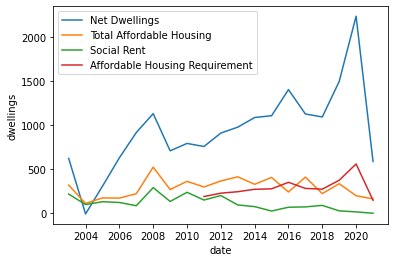

In [87]:
fig,ax = plt.subplots()
ax0 = sns.lineplot(x='date',y='netD',data=dcov_t)
ax1 = sns.lineplot(x='date',y='TAR',data=dcov_t)
ax2 = sns.lineplot(x='date',y='SR',data=dcov_t)
ax3 = sns.lineplot(x='date',y='AR_req',data=dcov_t)
plt.legend(['Net Dwellings','Total Affordable Housing','Social Rent','Affordable Housing Requirement'])
plt.ylabel('dwellings')

Affordable housing delivery started off being greater than the actual delivery required but has shown a falling trend in recent years. Let's visualise the percentage of total housing made up by affordable housing, social rent, and affordable rent.

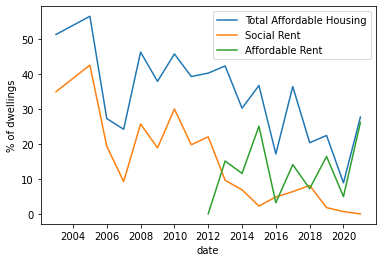

In [92]:
fig,ax = plt.subplots()
ax1 = sns.lineplot(x='date',y='TAR_p',data=dcov_t)
ax2 = sns.lineplot(x='date',y='SR_p',data=dcov_t)
ax3 = sns.lineplot(x='date',y='AR_p',data=dcov_t)
plt.legend(['Total Affordable Housing','Social Rent','Affordable Rent'])
plt.ylabel('% of dwellings')
ax1.invert_yaxis()

Until 2012, socially rented housing made up the majority of the supply of affordable housing in Coventry. Since, 2012 while affordable rent supply has been rising, the delivery of socially rented has been falling making up only about 25% of the affordable housing delivery, and has nearly fallen to 0 in recent years.

In [96]:
dcov_t['SR/TAR'] = dcov_t['SR']/dcov_t['TAR']*100
dcov_t['AR/TAR'] = dcov_t['AR']/dcov_t['TAR']*100

Text(0, 0.5, '% of TAR')

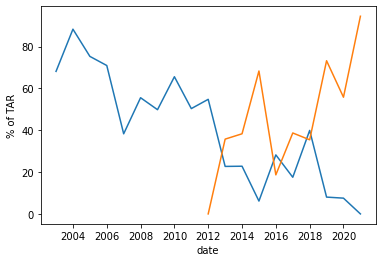

In [97]:
fig, ax = plt.subplots()
ax0 = sns.lineplot(x='date',y='SR/TAR',data=dcov_t)
ax1 = sns.lineplot(x='date',y='AR/TAR',data=dcov_t)
plt.ylabel('% of TAR')

According to Policy H6, social/affordable rent should make up 50% of the affordable housing provision, however it looks like affordable rent makes up nearly 100% of it now. _**[needs checking]**_